In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc


import time
from tqdm import tqdm
from metrics import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
cc = pd.read_csv('data/final_data.csv')

In [3]:
cc = cc.iloc[:,1:]
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   seniorcitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   monthlycharges                           7043 non-null   float64
 3   totalcharges                             7043 non-null   float64
 4   churn                                    7043 non-null   int64  
 5   gender_Female                            7043 non-null   int64  
 6   gender_Male                              7043 non-null   int64  
 7   partner_No                               7043 non-null   int64  
 8   partner_Yes                              7043 non-null   int64  
 9   dependents_No                            7043 non-null   int64  
 10  dependents_Yes                           7043 no

In [4]:
y = cc.churn
X = cc.drop('churn',axis=1)

In [5]:
mm = MinMaxScaler()
scaled_cc= pd.DataFrame(mm.fit_transform(X),columns=X.columns)
scaled_cc.head(2)

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0.0,0.013889,0.115423,0.003437,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [6]:
# split train-test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25,random_state=35)

## KNN Classifier

In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [10]:
test_pred1 = knn.predict(X_test)
#calculate metric
knn.score(X_test,y_test)

0.7694491766042022

In [11]:
# calculate 4 metrics
print(f"Precision: {precision_score(y_test, test_pred1)}")
print(f"Recall: {recall_score(y_test, test_pred1)}")
print(f"Accuracy: {accuracy_score(y_test, test_pred1)}")
print(f"F1: {f1_score(y_test, test_pred1)}")

Precision: 0.564179104477612
Recall: 0.4209354120267261
Accuracy: 0.7694491766042022
F1: 0.4821428571428572


In [12]:
# assign false positive, true positive, threshold
fpr,tpr,threshold = roc_curve(y_test,test_pred1)

In [14]:
# calculate auc score
auc_score = auc(fpr,tpr)
print(f'AUC Store: {auc_score}')

AUC Store: 0.654827462110924


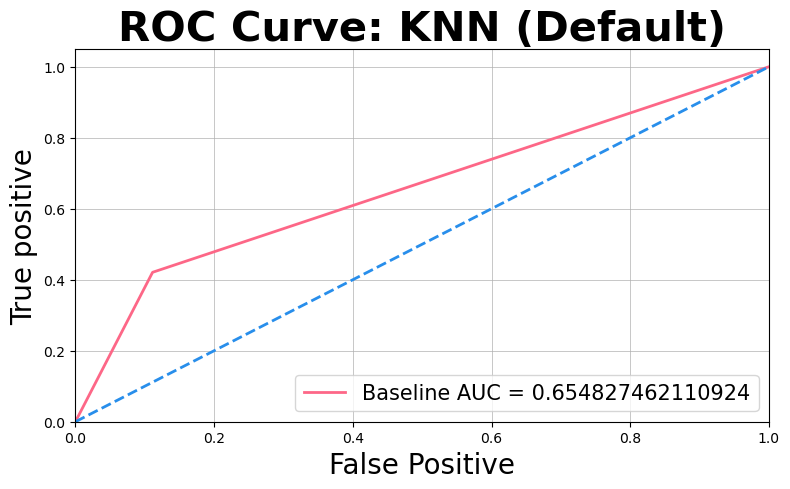

In [18]:
# plot auc curve
plt.figure(figsize=(8,5))
plt.grid(linewidth= .5)
plt.plot(fpr,tpr,color='#FD6787',lw =2, label = 'Baseline AUC = '+str(auc_score))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2,color='#288EEB')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive', fontsize = 20)
plt.ylabel('True positive', fontsize = 20)
plt.title('ROC Curve: KNN (Default)', fontsize = 30,fontweight = 'bold')
plt.legend(loc=4, fontsize= 15)
plt.tight_layout()

## Cross Validation KNN

In [21]:
knn_cv = KNeighborsClassifier()
# calculate cross validation score
knn_cv_score = cross_val_score(knn_cv,X_train,y_train, cv = 4)

# calculate mean accuracy score
meann_knn_cv_score = np.mean(knn_cv_score)

print(f'Mean Cross Validation: {meann_knn_cv_score:.2%}')

Mean Cross Validation: 75.62%


In [25]:
knn = KNeighborsClassifier()
# esstablish param grid
param_grid = {'n_neighbors':np.arange(1,25)}
# pass in knn object, param grid
knn_gscv = GridSearchCV(knn, param_grid,cv=4)
# fit train set
knn_gscv.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [27]:
# calculate best param and score
print(f'Best Parameter: {knn_gscv.best_params_}')
print(f'Best Score: {knn_gscv.best_score_}')

Best Parameter: {'n_neighbors': 19}
Best Score: 0.7786809235427706


In [29]:
# predict test values
test_pred_final = knn_gscv.predict(X_test)
# calculate accuracy score on optimal model
knn_gscv.score(X_test,y_test)

0.7864849517319704

In [30]:
# calculate 4 metrics
print(f"Precision: {precision_score(y_test, test_pred_final)}")
print(f"Recall: {recall_score(y_test, test_pred_final)}")
print(f"Accuracy: {accuracy_score(y_test, test_pred_final)}")
print(f"F1: {f1_score(y_test, test_pred_final)}")

Precision: 0.6387832699619772
Recall: 0.3741648106904232
Accuracy: 0.7864849517319704
F1: 0.47191011235955055


In [32]:
# assign false positive, true positive, threshold
fpr_final,tpr_final,threshold_final = roc_curve(y_test,test_pred_final)
# calculate auc score
auc_score_final = auc(fpr_final,tpr_final)
print(f'AUC Store: {auc_score_final}')

AUC Store: 0.6508781370525287


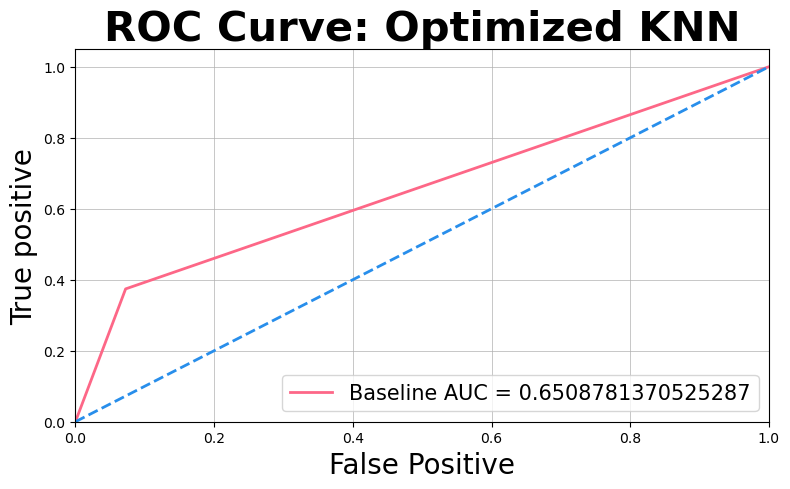

In [34]:
# plot auc curve
plt.figure(figsize=(8,5))
plt.grid(linewidth= .5)
plt.plot(fpr_final,tpr_final,color='#FD6787',lw =2, label = 'Baseline AUC = '+str(auc_score_final))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2,color='#288EEB')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive', fontsize = 20)
plt.ylabel('True positive', fontsize = 20)
plt.title('ROC Curve: Optimized KNN', fontsize = 30,fontweight = 'bold')
plt.legend(loc=4, fontsize= 15)
plt.tight_layout()